# Esercitazione 8: ground state 

Uso un campionamento di metropolis per calcolare il ground state di un sistema ad una particella confinata in un potenziale 

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Dal principio variazionale sappiamo infatti che 
$$
E_T= \frac{\bigl<\psi_T| \hat{\textit{H}}|\psi_T \bigr>}{\bigl<\psi_T|\psi_T \bigr>}\geq E_0=\frac{\bigl<\psi_0| \hat{\textit{H}}|\psi_0 \bigr>}{\bigl<\psi_0|\psi_0 \bigr>}
$$

Di coseguenza possiamo usare $E_T$ ottenere una stima (o quantomeno un limite superiore) di $E_0$

Per calcolare il valore medio usiamo l'algoritmo di Metropolis con una transizione di probabilità uniforme di passo scelto opportunamente in modo da rispettare la regola empirica del $50\%$. Si ha infatti che 

$$
E_T= \frac{\bigl<\psi_T| \hat{\textit{H}}|\psi_T \bigr>}{\bigl<\psi_T|\psi_T \bigr>}=\frac{\int d\vec{r}_1 ...d\vec{r}_N \psi_T^*(\vec{r}_1,..,\vec{r}_N)  \hat{\textit{H}} \psi_T(\vec{r}_1,..,\vec{r}_N)}{\int d\vec{r}_1 ...d\vec{r}_N |\psi_T(\vec{r}_1,..,\vec{r}_N)|^2}= \\
=\int d\vec{r}_1 ...d\vec{r}_N \frac{\psi_T^*(\vec{r}_1,..,\vec{r}_N) \psi_T(\vec{r}_1,..,\vec{r}_N) }{\int d\vec{r}_1 ...d\vec{r}_N |\psi_T(\vec{r}_1,..,\vec{r}_N)|^2}\frac{\hat{\textit{H}} \psi_T(\vec{r}_1,..,\vec{r}_N)}{\psi_T(\vec{r}_1,..,\vec{r}_N)}= \int d\vec{r}_1 ...d\vec{r}_N  p(\vec{r}_1,..,\vec{r}_N) E_T(\vec{r}_1,..,\vec{r}_N)
$$

e in questo modo è possibile calcolare il valore medio di $E_T$ campionando la distribuzione di probabilità $ p(\vec{r}_1,..,\vec{r}_N)=|\psi_T(\vec{r}_1,..,\vec{r}_N)|^2$ , dove la funzione d'onda di prova usata è:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D

## 8.1 

Con il codice sviluppato, il quale usa l'algoritmo di metropolis per stimare $E_T$ data una distribuzione di probabilità $p(x)=|\Psi_T^{\sigma,\mu}(x) |^2$, stimo l'energia di ground state con parametri (per ora casuali) $\mu=0.5$ e $\sigma=0.2$ 

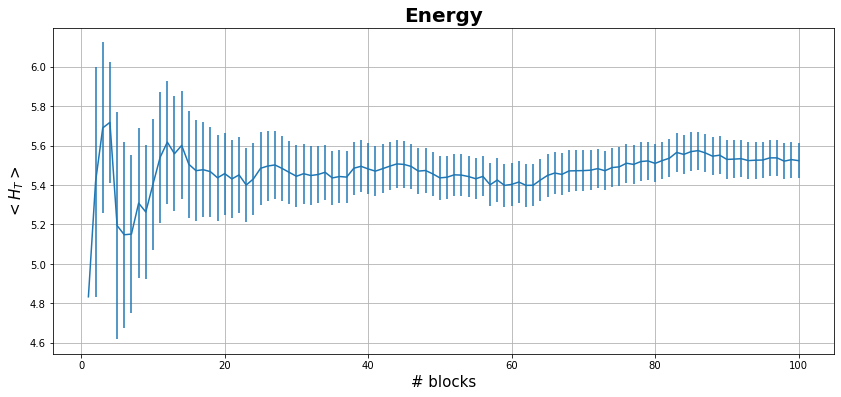

In [21]:
file=open('H_mean.out')
x_H,H,err_H=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

plt.figure(figsize=(14,6))
plt.errorbar(x_H/1000,H,yerr=err_H)
plt.xlabel('# blocks', fontsize=15)
plt.ylabel(r'$<H_T>$', fontsize=15)
plt.title('Energy', fontsize=20, fontweight='bold')
plt.grid(True)
plt.show()

# 8.1 & 8.2

Per trovare i migliori parametri $\mu$ e $\sigma$ che minimizzano l'energia, faccio una grid search nell'intervallo $\mu=[0.05, 1.05]$ e $\sigma=[0.05, 1.05]$ con passo $\delta=0.05$ per entrambi i parametri. Trovati i valori migliori $\mu_{best}$ e $\sigma_{best}$ per la prima grid search eseguo una seconda grid search più fine nell'intervallo  $\mu=[\mu_{best}-0.04, \mu_{best}+0.04]$ e $\sigma=[\sigma_{best}-0.04, \sigma_{best}+0.04]$ con passi da $\delta=0.002$

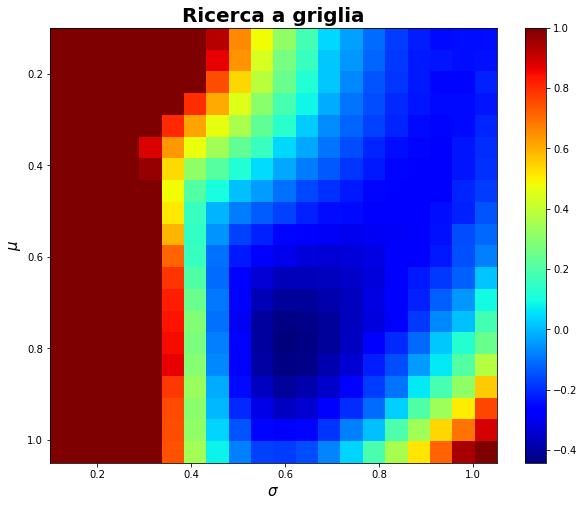

In [143]:
file=open('output.Firstgrid.dat')
mu1, sigma1, E1=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)
#print(sigma1)

E1grid=np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        E1grid[i][j]=E1[i*20+j]
        
MAX1=np.max(E1grid)
MIN1=np.min(E1grid)

extent=  np.min(sigma1),np.max(sigma1),np.max(mu1),np.min(mu1)

plt.figure(figsize=(10,8))
plt.imshow(E1grid,extent=extent,vmin=MIN1, vmax=1, cmap='jet', aspect='auto')
plt.title('Ricerca a griglia', fontsize=20, fontweight='bold')
plt.colorbar()
plt.ylabel(r'$\mu$', fontsize=15)
plt.xlabel(r'$\sigma$', fontsize=15)
plt.show()

-0.450056


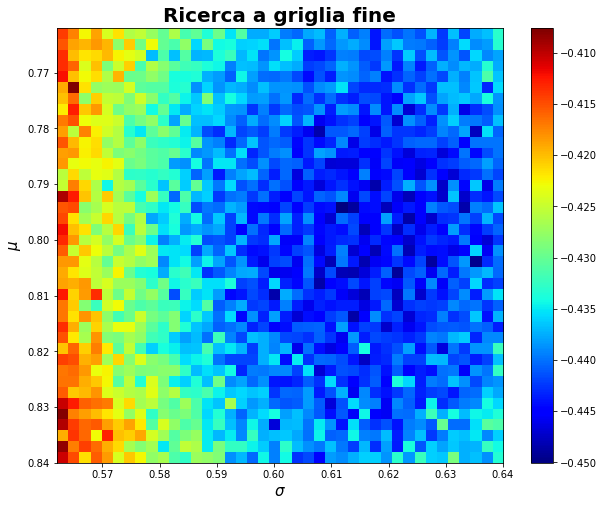

In [144]:
file=open('output.Secondgrid.dat')
mu2, sigma2, E2=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

lengrid=40
E2grid=np.zeros((lengrid, lengrid))
for i in range(lengrid):
    for j in range(lengrid):
        E2grid[i][j]=E2[i*lengrid+j]
     

    
print(np.min(E2grid))

MAX2=np.max(E2grid)
MIN2=np.min(E2grid)
extent= np.min(sigma2),np.max(sigma2), np.max(mu2),np.min(mu2)


plt.figure(figsize=(10,8))
plt.imshow(E2grid,extent=extent,vmin=MIN2, vmax=MAX2, cmap='jet', aspect='auto')
plt.title('Ricerca a griglia fine', fontsize=20, fontweight='bold')
plt.colorbar()
plt.ylabel(r'$\mu$', fontsize=15)
plt.xlabel(r'$\sigma$', fontsize=15)
plt.show()

I parametri ottimizzati risultano essere $\mu=0.794$ e $\sigma=0.612$. Calcolo di seguito l'energia con la statistica a blocchi e mostro un grafico di confronto tra la distribuzione di probabilità campionata e teorica

In [160]:
mu=0.794
sigma=0.612
def prob(x):
    func=np.exp(-np.power(x-mu,2)/(2*sigma**2))+np.exp(-np.power(x+mu,2)/(2*sigma**2))
    return np.absolute(np.power(func,2))

Ground state energy:  -0.46046587969271546


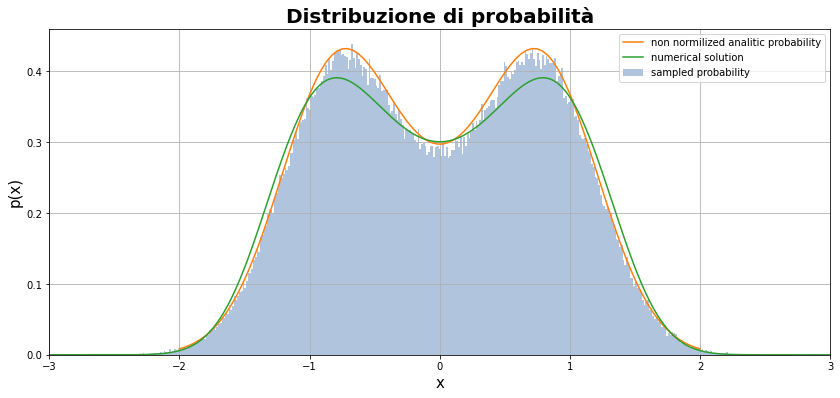

In [162]:
file=open('x_out_Optimized.out')
WF=np.loadtxt(file, delimiter=",", usecols=[0], unpack=True)

pos=np.linspace(-2,2,100)


def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

# Plot a few things
plt.figure(figsize=(14,6))
n, bins, patches = plt.hist(WF, bins=400, density=True, facecolor='lightsteelblue', label='sampled probability')
plt.plot(pos,prob(pos)/2.5,label='non normilized analitic probability')
plt.plot(x,(psi[0])**2,label='numerical solution' )
plt.legend()
plt.title("Distribuzione di probabilità", fontsize=20, fontweight='bold')
plt.xlabel("x", fontsize=15)
plt.ylabel("p(x)", fontsize=15)
plt.grid(True)
plt.xlim((-3,3))
plt.show()

Si osserva come la distribuzione di probabilità campionata è in buon accordo con la soluzione analitica, ma non altrettanto in accordo con quella numerica

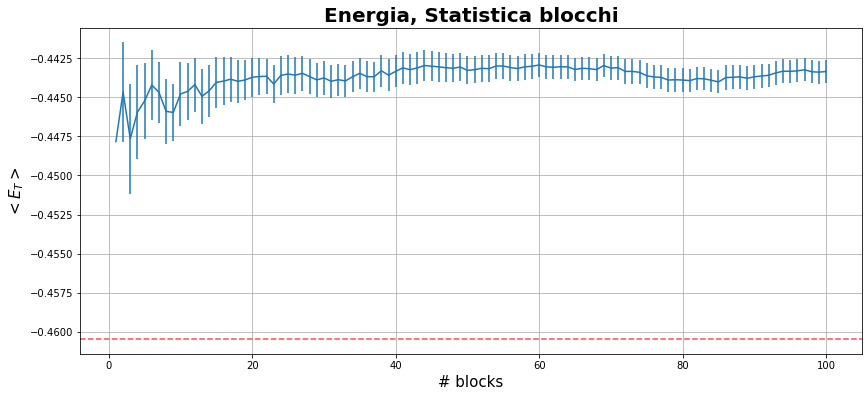

In [167]:
file=open('H_mean_Opt.out')
x_H,H,err_H=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

N_blocks=100
plt.figure(figsize=(14,6))
plt.errorbar(x_H/(np.max(x_H)/N_blocks),H,yerr=err_H)
plt.xlabel('# blocks', fontsize=15)
plt.ylabel(r'$<E_T>$', fontsize=15)
plt.axhline(-0.46046587969271546, color='red', ls='--', alpha=0.7)
plt.title('Energia, Statistica blocchi', fontsize=20, fontweight='bold')
plt.grid(True)
plt.show()

Si osserva come il calcolo l'energia media di prova non è compatibile con l'energia del ground state. Nonostante non sia necessario che le due siano compatibili ($<E_T>$ è comunque un limite superiore), potrebbe voler dire che la ricerca dei valori $\mu$ e $\sigma$ che minimizzano l'energia, o che può essere migliorata la forma funzionale della funzione d'onda  

# 8.4 PIGS/PIMC

In quest'ultima parte uso gli algoritmi PIGS e PIMC per campionare la funzione d'onda. Nel caso di PIGS studio la funzione d'onda partendo da una funzione d'onda di prova costante ed una invece come quella usata sopra $\Psi_T^{\sigma,\mu}(x)$, con i parametri ottimizzati dalla ricerca a griglia.

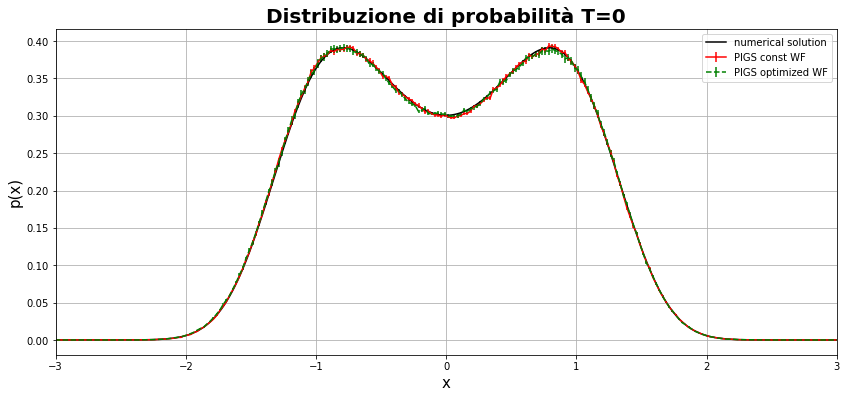

In [201]:
file=open('QMC_1D/PIGS/probability_constWF.dat')
x_pigs_const,prob_pigs_const,err_pigs_const=np.loadtxt(file, delimiter=" ", usecols=[0,1,2], unpack=True)
file=open('QMC_1D/PIGS/probability.ITP.dat')
x_pigs,prob_pigs,err_pigs=np.loadtxt(file, delimiter=" ", usecols=[0,1,2], unpack=True)


plt.figure(figsize=(14,6))
#n, bins, patches = plt.hist(WF, bins=400, density=True, facecolor='lightsteelblue', label='sampled probability')
plt.errorbar(x_pigs_const,prob_pigs_const,yerr=err_pigs_const,color='red', label='PIGS const WF')
plt.errorbar(x_pigs,prob_pigs,yerr=err_pigs,color='green' , ls='--',label='PIGS optimized WF')
#plt.plot(pos,prob(pos)/2.5,color='red', label='non normilized analitic probability')
plt.plot(x,(psi[0])**2, color='black',label='numerical solution' )
plt.legend()
plt.title("Distribuzione di probabilità T=0", fontsize=20, fontweight='bold')
plt.xlabel("x", fontsize=15)
plt.ylabel("p(x)", fontsize=15)
plt.grid(True)
plt.xlim((-3,3))
plt.show()

Si osserva come sia per la funzione d'onda costante che quella ottimizzata, la funzione d'onda campionata dall'algoritmo PIGS risulta essere compatibile con il valore numerico.

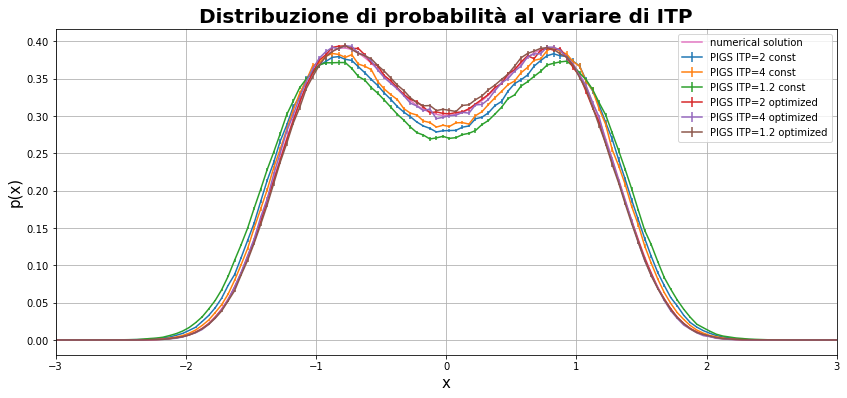

In [200]:
cartella='QMC_1D/PIGS/ITP/'
files_const= ['probability_ITP_2.const.dat','probability_ITP_4.const.dat','probability_ITP_1_2.const.dat' ]
ITPs=[2,4,1.2]

files= ['probability_ITP_2.dat','probability_ITP_1_5.dat','probability_ITP_1_2.dat' ]

plt.figure(figsize=(14,6))

for i in range(len(files_const)):
    x_ITP,prob_ITP,err_ITP=np.loadtxt(cartella+files_const[i], delimiter=" ", usecols=[0,1,2], unpack=True)
    plt.errorbar(x_ITP,prob_ITP,yerr=err_ITP,label=f'PIGS ITP={ITPs[i]} const')
    
for i in range(len(files)):
    x_ITP,prob_ITP,err_ITP=np.loadtxt(cartella+files[i], delimiter=" ", usecols=[0,1,2], unpack=True)
    plt.errorbar(x_ITP,prob_ITP,yerr=err_ITP,label=f'PIGS ITP={ITPs[i]} optimized')
    
plt.plot(x,(psi[0])**2,label='numerical solution' )
plt.legend()
plt.title("Distribuzione di probabilità al variare di ITP", fontsize=20, fontweight='bold')
plt.xlabel("x", fontsize=15)
plt.ylabel("p(x)", fontsize=15)
plt.grid(True)
plt.xlim((-3,3))
plt.show()



Si osserva come al diminuire del tempo immaginario, il campionamento fatto utilizzando una funzione d'onda di prova costante diventi meno preciso. Si nota un significativo discostamente già utilizzando $ITP=4$, invece che $ITP=8$. Mentre il campionamento fatto utilizzando la funzione d'onda ottimizzata risulta essere compatibile per tutti i tempi immaginari usati

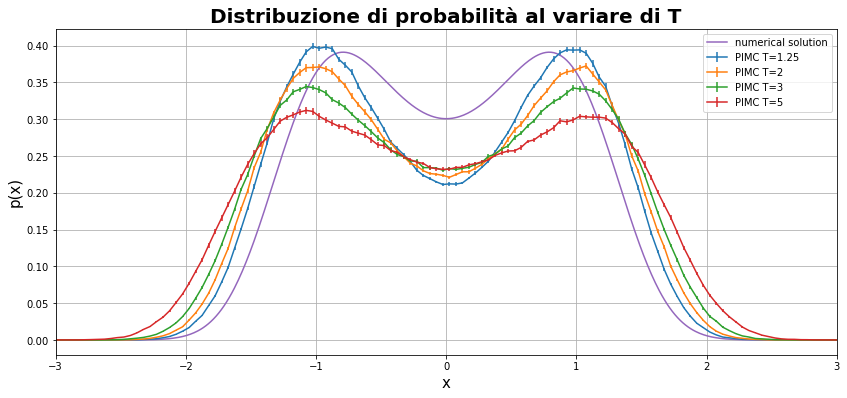

In [183]:
file=open('QMC_1D/PIMC/temperatures/probability_T2.dat')
x_pimc_T2,prob_pimc_T2,err_pimc_T2=np.loadtxt(file, delimiter=" ", usecols=[0,1,2], unpack=True)

file=open('QMC_1D/PIMC/temperatures/probability_T3.dat')
x_pimc_T3,prob_pimc_T3,err_pimc_T3=np.loadtxt(file, delimiter=" ", usecols=[0,1,2], unpack=True)

file=open('QMC_1D/PIMC/temperatures/probability_T5.dat')
x_pimc_T5,prob_pimc_T5,err_pimc_T5=np.loadtxt(file, delimiter=" ", usecols=[0,1,2], unpack=True)


plt.figure(figsize=(14,6))
#n, bins, patches = plt.hist(WF, bins=400, density=True, facecolor='lightsteelblue', label='sampled probability')
plt.errorbar(x_pimc,prob_pimc,yerr=err_pimc,label='PIMC T=1.25')
plt.errorbar(x_pimc_T2,prob_pimc_T2,yerr=err_pimc_T2,label='PIMC T=2')
plt.errorbar(x_pimc_T3,prob_pimc_T3,yerr=err_pimc_T3,label='PIMC T=3')
plt.errorbar(x_pimc_T5,prob_pimc_T5,yerr=err_pimc_T5,label='PIMC T=5')

plt.plot(x,(psi[0])**2,label='numerical solution' )
plt.legend()
plt.title("Distribuzione di probabilità al variare di T", fontsize=20, fontweight='bold')
plt.xlabel("x", fontsize=15)
plt.ylabel("p(x)", fontsize=15)
plt.grid(True)
plt.xlim((-3,3))
plt.show()

Si osserva come all'aumentare della temperatura la distribuzione di probabilità si allarga e